# Thompson Sampling

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [19]:
import random

# N = number of users we're showing an ad to
N = 10000

# d = number of ads we are testing
d = 10

# list of ads we've chosen to show to each users (length = N)
ads_selected = []

# list tracking the count of times each ad has been rewarded with 1
numbers_of_rewards_1 = [0] * d

# list tracking the count of times each ad has been rewarded with 0
numbers_of_rewards_0 = [0] * d

# count of the total times users have clicked an ad
total_reward = 0

# n is an int representing each user
for n in range(0, N):
    # ad = the index of the ad (column number)
    ad = 0 
    # max_random is the maximum of the random draws among our 10 ads
    max_random = 0

    # i is an int representing each ad
    for i in range(0, d):
        # we take a random draw from the distribution
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)

        # as loop through our 10 ads, we use this max_random to track which of our 10 ads has the highest random draw
        if (random_beta > max_random):
            max_random = random_beta
            ad = i # ad i is the ad we will show the user

    # add ad to our list tracking which ads we've shown
    ads_selected.append(ad)

    # look up in our dataset and check whether user n clicks ad i 
    # 1 means they clicked the ad, 0 means they didn't click the ad
    reward = dataset.values[n, ad] 

    # if reward = 1 we update the numbers_of_rewards_1 for the given ad, else we update  the numbers_of_rewards_0 for the given ad
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1

    # add that reward to our count of times *ANY* ad has been clicked
    total_reward += reward

## Visualising the results - Histogram

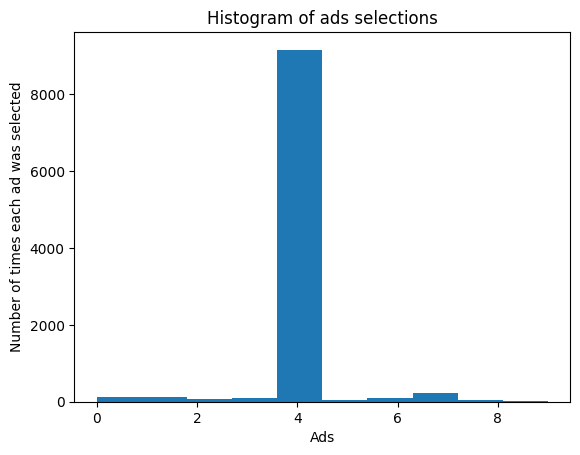

In [20]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()